In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import numpy as np
import torch
from dynamic_quant_ops import tensor_quant_gelu
import matplotlib.pyplot as plt

In [15]:
inputs = torch.from_numpy(np.linspace(-2,2,10000))
gelu_gt = torch.nn.functional.gelu(inputs)
gelu_test = tensor_quant_gelu(inputs)

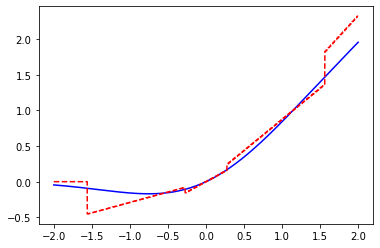

In [16]:
plt.plot(inputs, gelu_gt, 'b')
plt.plot(inputs, gelu_test, 'r--')
plt.show()